## Task : Predicting Hypertension Using Medical Check-up Data \<Classfication\>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action="ignore", category=UserWarning)

### READ CSV FILE

#### 2022년도 건강검진정보 data 확인

In [2]:
# read csv file
data = pd.read_csv('국민건강보험공단_건강검진정보_20221231.csv', encoding='cp949')
data.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,...,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,...,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN


In [3]:
# chack data having missing value(NaN value)
data_na = data.isna()
data_na.sum()

기준년도                0
가입자일련번호             0
시도코드                0
성별                  0
연령대코드(5세단위)         0
신장(5cm단위)           0
체중(5kg단위)           0
허리둘레              392
시력(좌)             186
시력(우)             185
청력(좌)             115
청력(우)             116
수축기혈압            5556
이완기혈압            5556
식전혈당(공복혈당)       5611
총콜레스테롤         654382
트리글리세라이드       654386
HDL콜레스테롤       654386
LDL콜레스테롤       660926
혈색소              5616
요단백             11054
혈청크레아티닌          5615
혈청지오티(AST)       5613
혈청지피티(ALT)       5613
감마지티피            5611
흡연상태               96
음주여부               73
구강검진수검여부            0
치아우식증유무        655671
치석             655670
dtype: int64

In [4]:
# Hadle missing value - drop : NaN data 
data_drop = data.copy()
data_drop = data_drop.dropna(subset=['수축기혈압', '이완기혈압'])

print(data_drop.isna().sum())
print()
print(data_drop.shape)

기준년도                0
가입자일련번호             0
시도코드                0
성별                  0
연령대코드(5세단위)         0
신장(5cm단위)           0
체중(5kg단위)           0
허리둘레              392
시력(좌)             178
시력(우)             177
청력(좌)             114
청력(우)             115
수축기혈압               0
이완기혈압               0
식전혈당(공복혈당)         76
총콜레스테롤         648833
트리글리세라이드       648837
HDL콜레스테롤       648837
LDL콜레스테롤       655377
혈색소                81
요단백              5519
혈청크레아티닌            80
혈청지오티(AST)         78
혈청지피티(ALT)         78
감마지티피              76
흡연상태               96
음주여부               73
구강검진수검여부            0
치아우식증유무        650119
치석             650118
dtype: int64

(994443, 30)


In [5]:
# if) drop all missing value data
data_drop = data_drop.dropna()

print(data_drop.isna().sum())
print()
print(data_drop.shape)  # 사용 가능한 데이터가 너무 적어짐 -> 다른 년도 건강검진 데이터 추가

기준년도           0
가입자일련번호        0
시도코드           0
성별             0
연령대코드(5세단위)    0
신장(5cm단위)      0
체중(5kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
혈청지오티(AST)     0
혈청지피티(ALT)     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
dtype: int64

(106876, 30)


#### 2022년도~2019년도 건강검진정보 data 확인 및 수정 & 최종본 저장

In [46]:
# 2021년도 건강검진정보 csv
data_2021 = pd.read_csv('국민건강보험공단_건강검진정보_20211231.csv', encoding='cp949')
print(data_2021.shape)
print(data_2021.columns)

(1000000, 30)
Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')


In [45]:
# 2020년도 건강검진정보 csv
data_2020 = pd.read_csv('국민건강보험공단_건강검진정보_20201231.csv', encoding='cp949')
print(data_2020.shape)
print(data_2020.columns)

(1000000, 30)
Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')


In [57]:
# 2019년도 건강검진정보 csv
data_2019 = pd.read_csv('국민건강보험공단_건강검진정보_20191231.csv', encoding='cp949')
print(data_2019.shape)
print(data_2019.columns)
print('='*120)

# 바꿀 columns
column_rename = {'가입자 일련번호':'가입자일련번호',
          '성별코드':'성별',
          '연령대 코드(5세단위)':'연령대코드(5세단위)',
          '신장(5Cm단위)':'신장(5cm단위)',
          '체중(5Kg 단위)':'체중(5kg단위)',
          '수축기 혈압':'수축기혈압',
          '이완기 혈압':'이완기혈압',
          '총 콜레스테롤':'총콜레스테롤',
          'HDL 콜레스테롤':'HDL콜레스테롤',
          'LDL 콜레스테롤':'LDL콜레스테롤',
          '(혈청지오티)AST':'혈청지오티(AST)',
          '(혈청지오티)ALT':'혈청지피티(ALT)',
          '감마 지티피':'감마지티피',
          '구강검진 수검여부':'구강검진수검여부'}

# column drop & change
data_2019.drop(columns=['결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상', '데이터 공개일자'], inplace=True)
data_2019.rename(columns=column_rename, inplace=True)

print(data_2019.shape)
print(data_2019.columns)

data_2019.to_csv('국민건강보험공단_건강검진정보_20191231.csv', encoding='cp949', index=False)

(1000000, 34)
Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')
(1000000, 30)
Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')


In [6]:
# read al csv files
csv_files = ['국민건강보험공단_건강검진정보_20221231.csv', '국민건강보험공단_건강검진정보_20211231.csv',
             '국민건강보험공단_건강검진정보_20201231.csv', '국민건강보험공단_건강검진정보_20191231.csv']

datas = [pd.read_csv(file_name, encoding='cp949') for file_name in csv_files]
data_fin = pd.concat(datas, ignore_index=True)

In [7]:
data_fin.to_csv('국민건강보험공단_건강검진정보_fin.csv', encoding='cp949', index=False)

In [7]:
data_fin.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,...,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,...,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN


In [8]:
data_fin.shape

(4000000, 30)

### COLUMN

#### missing value

In [9]:
# drop the data having missing value
data_fin_dropna = data_fin.copy()
data_fin_dropna = data_fin_dropna.dropna()

print(data_fin_dropna.isna().sum())
print()
print(data_fin_dropna.shape)

기준년도           0
가입자일련번호        0
시도코드           0
성별             0
연령대코드(5세단위)    0
신장(5cm단위)      0
체중(5kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
혈청지오티(AST)     0
혈청지피티(ALT)     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
dtype: int64

(408002, 30)


#### add columns like '고혈압', 'BMI'

In [10]:
# add label like '고혈압', 'BMI
# '고혈압' : 수축기 혈압 140 이상이면서 이완기 혈압이 90 이상 -> 1 : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9548597
data_fin_dropna['고혈압'] = np.where((data_fin_dropna['수축기혈압'] >= 140) & (data_fin_dropna['이완기혈압'] >= 90), 1, 0)

# 'BMI' : 체중(kg) / 신장(m) ** 2 : https://www.hanam.go.kr/health/contents.do?key=8926
data_fin_dropna['신장(5cm단위)'] *= 0.01
data_fin_dropna['BMI'] = data_fin_dropna['체중(5kg단위)'] / (data_fin_dropna['신장(5cm단위)'] ** 2)
data_fin_dropna.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,고혈압,BMI
654336,2022,3955070,11,1,13,1.65,60,80.0,0.8,0.9,...,22.0,17.0,34.0,2.0,1.0,1,0.0,0.0,0,22.038567
654342,2022,3997252,42,1,15,1.75,75,80.0,0.8,0.7,...,22.0,16.0,31.0,2.0,1.0,1,0.0,1.0,1,24.489796
654343,2022,2320510,41,1,7,1.70,70,80.0,1.0,1.0,...,22.0,32.0,30.0,1.0,1.0,1,0.0,1.0,0,24.221453
654346,2022,3842998,41,2,14,1.55,50,80.0,1.0,0.5,...,22.0,19.0,13.0,1.0,0.0,1,0.0,0.0,0,20.811655
654352,2022,1063593,41,1,13,1.70,55,80.0,1.2,0.7,...,22.0,13.0,17.0,1.0,1.0,1,0.0,1.0,0,19.031142


In [11]:
# '고혈압' column의 value 개수 확인
data_fin_dropna_drop = data_fin_dropna.copy()
data_fin_dropna_drop['고혈압'].value_counts()

고혈압
0    388245
1     19757
Name: count, dtype: int64

#### under-sampling

In [12]:
# under-sampling
from sklearn.utils import resample  # https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

# 다수 클래스 : '고혈압' == 0
data_fin_dropna_drop_majority = data_fin_dropna_drop[data_fin_dropna_drop.고혈압 == 0]

# 소수 클래스 : '고혈압' == 1
data_fin_dropna_drop_minority = data_fin_dropna_drop[data_fin_dropna_drop.고혈압 == 1]

# 다수 클래스 언더샘플링
data_fin_dropna_drop_majority_undersampled = resample(data_fin_dropna_drop_majority, 
                                                      replace=False,
                                                      n_samples=len(data_fin_dropna_drop_minority), # 소수 클래스와 동일한 수로 샘플링
                                                      random_state=42)

# 소수 클래스와 합침
data_fin_dropna_drop = pd.concat([data_fin_dropna_drop_majority_undersampled, data_fin_dropna_drop_minority])

# 클래스 분포 확인
print("\nBalanced class distribution:")
print(data_fin_dropna_drop['고혈압'].value_counts())
print()
print(data_fin_dropna_drop.count())



Balanced class distribution:
고혈압
0    19757
1    19757
Name: count, dtype: int64

기준년도           39514
가입자일련번호        39514
시도코드           39514
성별             39514
연령대코드(5세단위)    39514
신장(5cm단위)      39514
체중(5kg단위)      39514
허리둘레           39514
시력(좌)          39514
시력(우)          39514
청력(좌)          39514
청력(우)          39514
수축기혈압          39514
이완기혈압          39514
식전혈당(공복혈당)     39514
총콜레스테롤         39514
트리글리세라이드       39514
HDL콜레스테롤       39514
LDL콜레스테롤       39514
혈색소            39514
요단백            39514
혈청크레아티닌        39514
혈청지오티(AST)     39514
혈청지피티(ALT)     39514
감마지티피          39514
흡연상태           39514
음주여부           39514
구강검진수검여부       39514
치아우식증유무        39514
치석             39514
고혈압            39514
BMI            39514
dtype: int64


### FONT SETTING

In [13]:
# check font list
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list.sort()
font_list

['Agency FB',
 'Agency FB',
 'Algerian',
 'AlienCaret',
 'Ami R',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Bell MT',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Californian FB',
 'Californian FB',
 'Californian FB',
 'Calisto MT',
 'Calisto MT',
 'Calisto MT',
 'Calisto MT',
 'Cambria',
 '

In [14]:
# set font
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = True

### CHECK FEATURES IMPORTANCE

In [14]:
from sklearn.model_selection import train_test_split

# except ['기준년도', '가입자일련번호', '수축기혈압', '이완기혈압', '구강검진수검여부']
X_features_all = ['시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)',
                  '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
                  '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
                  '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)',
                  '감마지티피', '흡연상태', '음주여부', '치아우식증유무', '치석']

X = data_fin_dropna_drop[X_features_all]
y = data_fin_dropna_drop['고혈압']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier # https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [16]:
print(rf.feature_importances_)
print()

ser = pd.Series(rf.feature_importances_, index=X_features_all)
ser_sort = ser.sort_values(ascending=False)
print(ser_sort)

[0.03965897 0.00495976 0.05297678 0.03120854 0.04167858 0.08789874
 0.03472825 0.03558872 0.0037797  0.00320957 0.07252203 0.06220077
 0.07461547 0.05787871 0.06107283 0.06323505 0.00794747 0.03530324
 0.05249328 0.05689087 0.07563888 0.01388694 0.00795235 0.00809453
 0.01457998]

허리둘레           0.087899
감마지티피          0.075639
트리글리세라이드       0.074615
식전혈당(공복혈당)     0.072522
혈색소            0.063235
총콜레스테롤         0.062201
LDL콜레스테롤       0.061073
HDL콜레스테롤       0.057879
혈청지피티(ALT)     0.056891
연령대코드(5세단위)    0.052977
혈청지오티(AST)     0.052493
체중(5kg단위)      0.041679
시도코드           0.039659
시력(우)          0.035589
혈청크레아티닌        0.035303
시력(좌)          0.034728
신장(5cm단위)      0.031209
치석             0.014580
흡연상태           0.013887
치아우식증유무        0.008095
음주여부           0.007952
요단백            0.007947
성별             0.004960
청력(좌)          0.003780
청력(우)          0.003210
dtype: float64


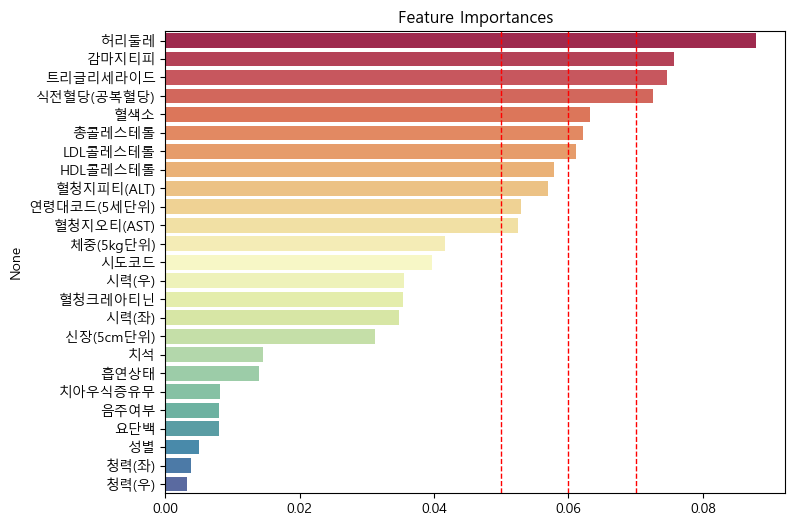

In [20]:
palettes = sns.color_palette('Spectral', len(ser_sort)) # https://seaborn.pydata.org/generated/seaborn.color_palette.html
x_line = [0.05, 0.06, 0.07]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ser_sort.values, y=ser_sort.index, palette=palettes)
for x in x_line:
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1)
plt.savefig('feature importances.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [250]:
# 기준 (standard OR standard + '고혈압')
# standard_07 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)']
# standard_06 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)', '혈색소', '총콜레스테롤', 'LDL콜레스테롤']
# standard_05 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)', '혈색소', '총콜레스테롤', 'LDL콜레스테롤', 'HDL콜레스테롤', '혈청지피티(ALT)', '혈청지오티(AST)', '연령대코드(5세단위)']

### CORRELATION

In [26]:
# 기준으로 삼은 x축 + 고혈압 추가 (correlation 시각화용)
standard_07 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)', '고혈압']
standard_06 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)', '혈색소', '총콜레스테롤', 'LDL콜레스테롤', '고혈압']
standard_05 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)', '혈색소', '총콜레스테롤', 'LDL콜레스테롤',
               'HDL콜레스테롤', '혈청지피티(ALT)', '혈청지오티(AST)', '연령대코드(5세단위)', '고혈압']

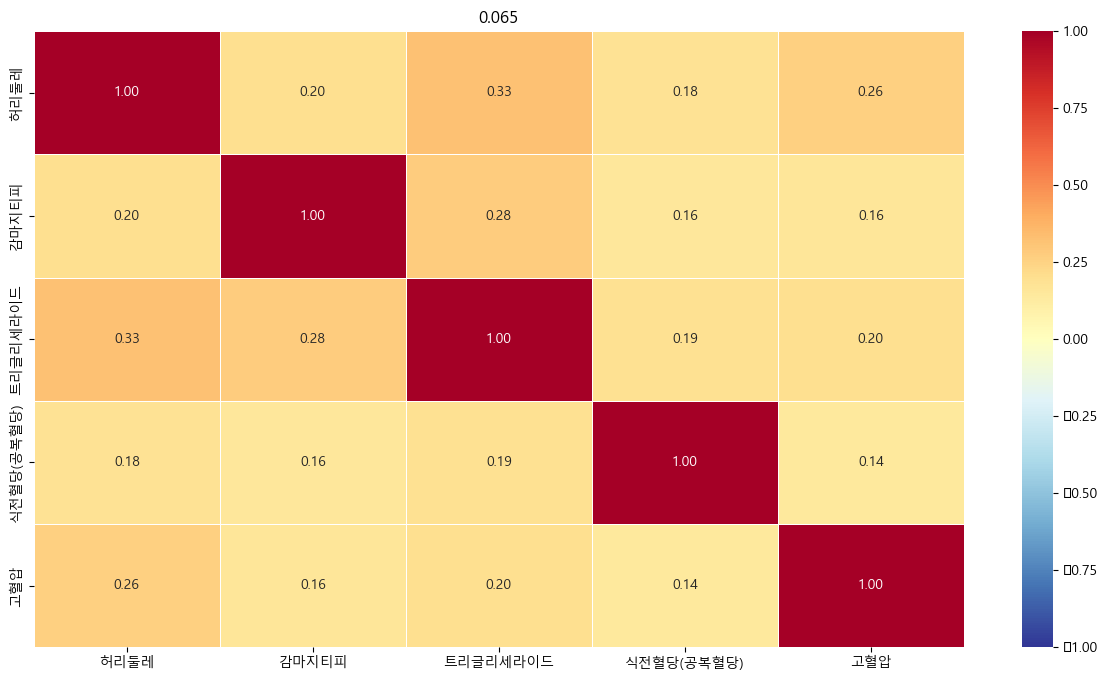

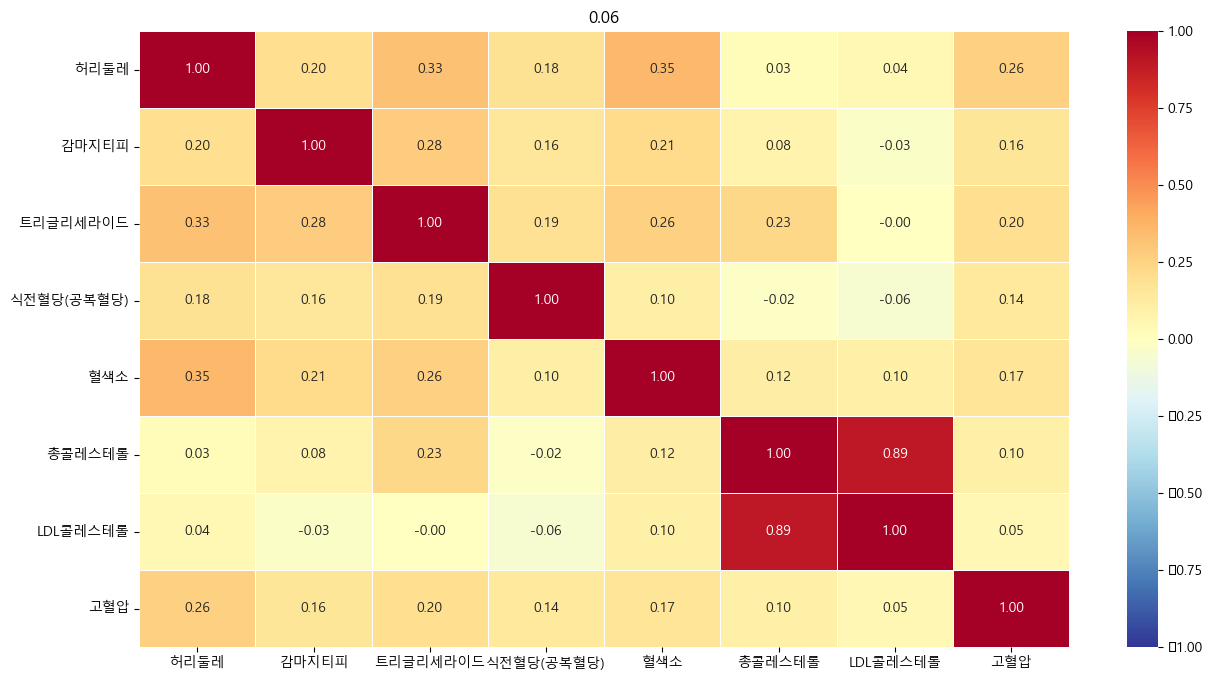

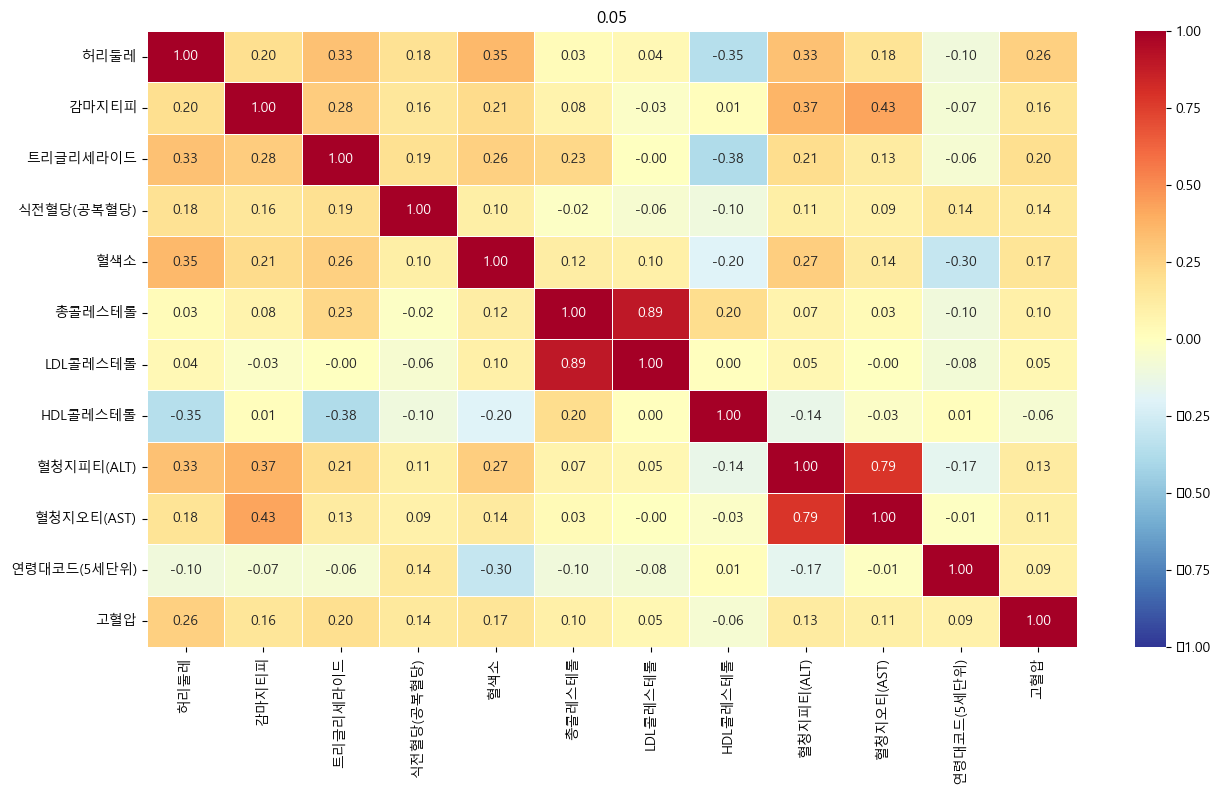

In [22]:
# check correlation and save the image
# 상관계수 값이 1에 가까우면 양의 상관관계, -1에 가까우면 음의 상관관계, 0에 가까우면 두 변수 간 상관관계 x
data_fin_dropna_drop_corr = data_fin_dropna_drop.copy()
data_fin_dropna_drop_corr07 = data_fin_dropna_drop_corr.copy()
data_fin_dropna_drop_corr06 = data_fin_dropna_drop_corr.copy()
data_fin_dropna_drop_corr05 = data_fin_dropna_drop_corr.copy()

data_fin_dropna_drop_corr07 = data_fin_dropna_drop_corr07[standard_07]
data_fin_dropna_drop_corr06 = data_fin_dropna_drop_corr06[standard_06]
data_fin_dropna_drop_corr05 = data_fin_dropna_drop_corr05[standard_05]

data_fin_dropna_drop_corr07 = data_fin_dropna_drop_corr07.corr()
data_fin_dropna_drop_corr06 = data_fin_dropna_drop_corr06.corr()
data_fin_dropna_drop_corr05 = data_fin_dropna_drop_corr05.corr()

# visualization
plt.figure(figsize=(15, 8))
sns.heatmap(data_fin_dropna_drop_corr07, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r')
plt.title('0.065')
plt.savefig('data_fin_dropna_drop_corr07.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 8))
sns.heatmap(data_fin_dropna_drop_corr06, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r')
plt.title('0.06')
plt.savefig('data_fin_dropna_drop_corr06.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 8))
sns.heatmap(data_fin_dropna_drop_corr05, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r')
plt.title('0.05')
plt.savefig('data_fin_dropna_drop_corr05.jpg', dpi=300, bbox_inches='tight')
plt.show()


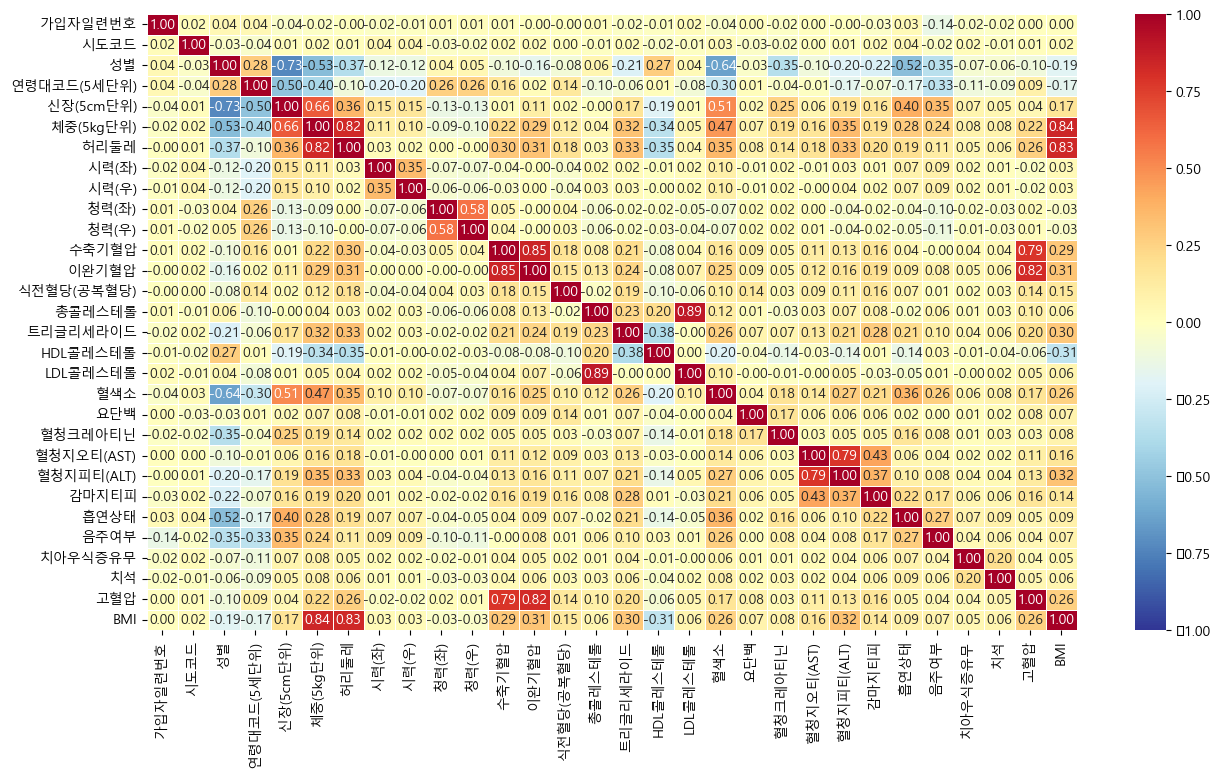

In [23]:
# check correlation and save the image of all columns
data_fin_dropna_drop_corr = data_fin_dropna_drop.corr()
data_fin_dropna_drop_corr.drop(index=['기준년도', '구강검진수검여부'], columns=['기준년도', '구강검진수검여부'], inplace=True)

plt.figure(figsize=(15, 8))
sns.heatmap(data_fin_dropna_drop_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r')
plt.savefig('data_fin_dropna_drop_corr.jpg', dpi=300, bbox_inches='tight')
plt.show()
# plt.close()

### MODEL

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [27]:
# 기준으로 삼은 x축 사용
standard_07 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)']
standard_06 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)', '혈색소', '총콜레스테롤', 'LDL콜레스테롤']
standard_05 = ['허리둘레', '감마지티피', '트리글리세라이드', '식전혈당(공복혈당)', '혈색소', '총콜레스테롤', 'LDL콜레스테롤',
               'HDL콜레스테롤', '혈청지피티(ALT)', '혈청지오티(AST)', '연령대코드(5세단위)']

In [23]:
# models setting
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.01, subsample=0.7)
}

In [24]:
# visualize confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name, x_line):
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat, annot=True, fmt='g', cbar=False)
    plt.title(f'{model_name}  {x_line}\n[Confusion Matrix]')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.savefig(f'{model_name}_{x_line}_Confusion Matrix.jpg', dpi=300, bbox_inches='tight')
    plt.show()

# visualize rov curve
def plot_roc_curve(X_test, y_test, model, model_name, x_line):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='red', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(f'{model_name}  {x_line}\n[Receiver Operating Characteristic]')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_{x_line}_Receiver Operating Characteristic.jpg', dpi=300, bbox_inches='tight')
    plt.show()

standard x line : 0.07 >
  Logistic Regression
  Accuracy: 0.617740   Precision: 0.624458   Recall: 0.584666   F1-score: 0.603907



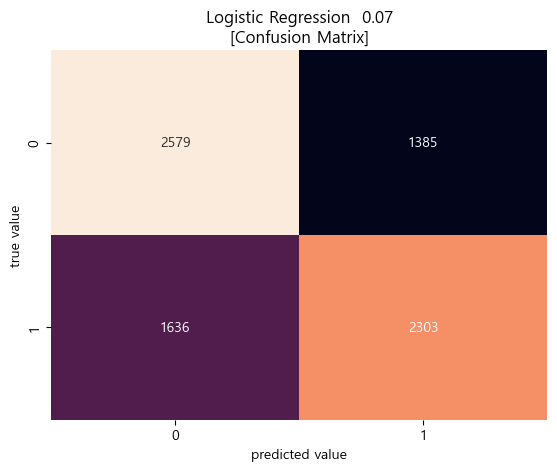

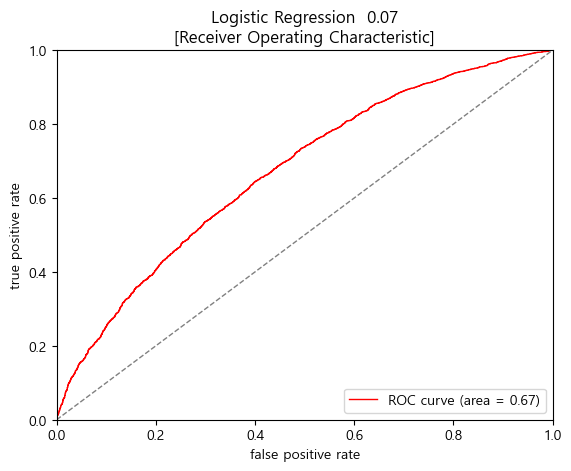

  Decision Tree
  Accuracy: 0.551689   Precision: 0.550330   Recall: 0.549632   F1-score: 0.549981



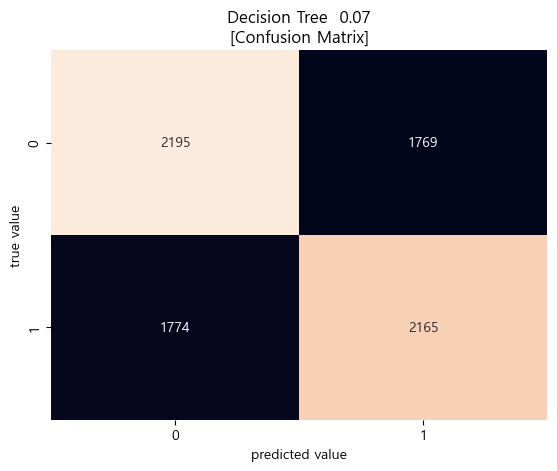

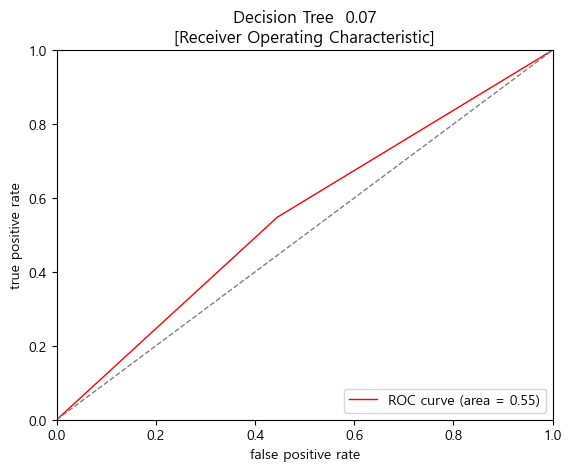

  Random Forest
  Accuracy: 0.599899   Precision: 0.596907   Recall: 0.607515   F1-score: 0.602164



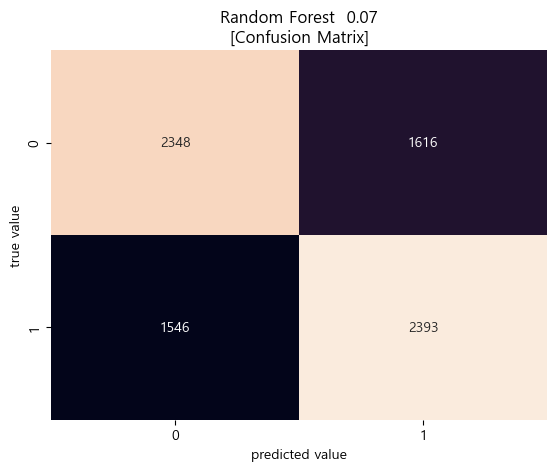

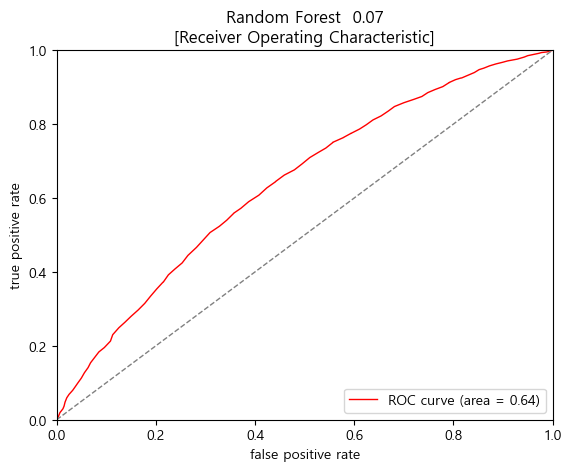

  XGBoost
  Accuracy: 0.621789   Precision: 0.615124   Recall: 0.644326   F1-score: 0.629386



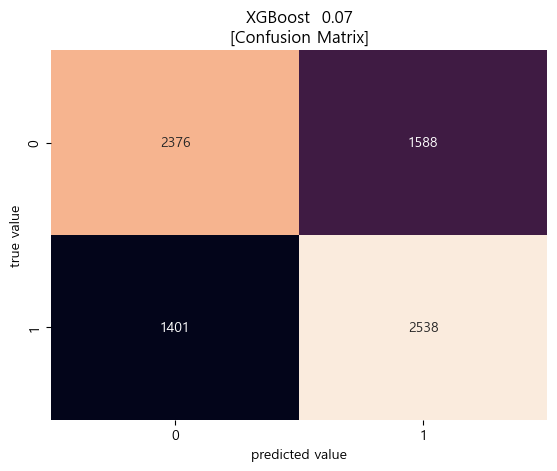

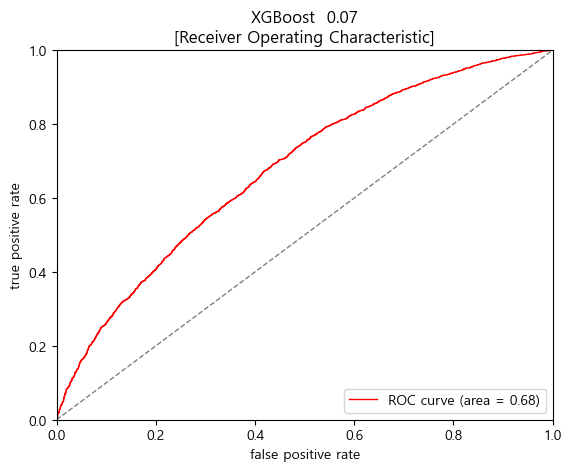


standard x line : 0.06 >
  Logistic Regression
  Accuracy: 0.628369   Precision: 0.633957   Recall: 0.601929   F1-score: 0.617528



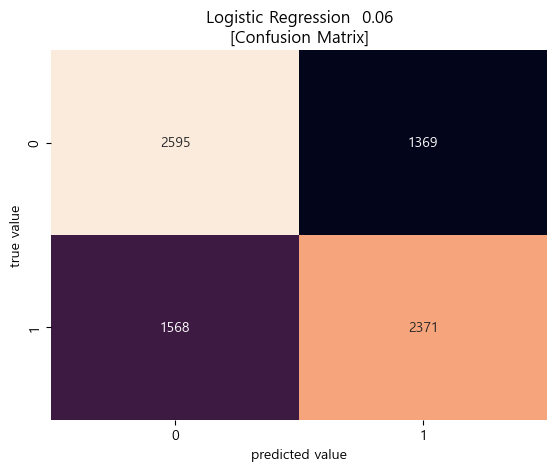

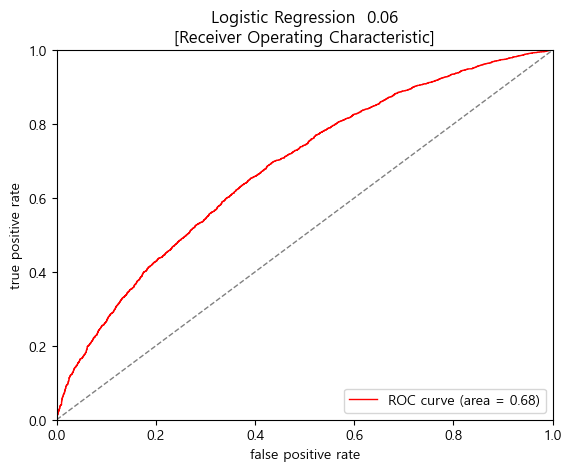

  Decision Tree
  Accuracy: 0.547514   Precision: 0.546148   Recall: 0.545316   F1-score: 0.545732



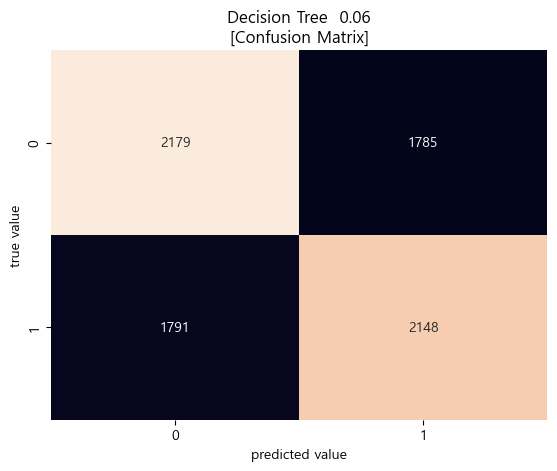

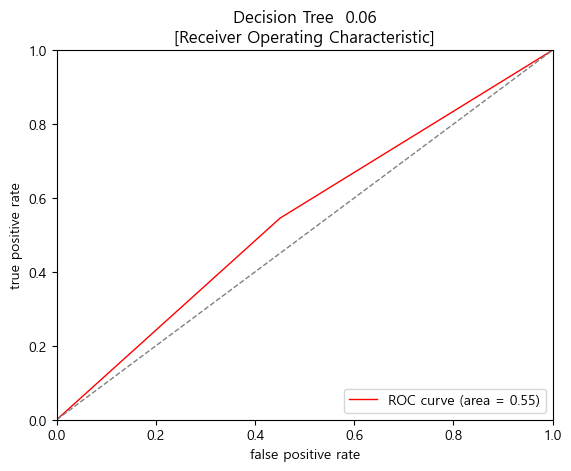

  Random Forest
  Accuracy: 0.621030   Precision: 0.621399   Recall: 0.613354   F1-score: 0.617350



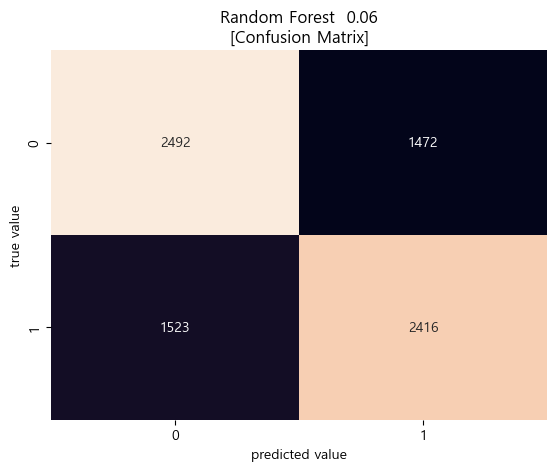

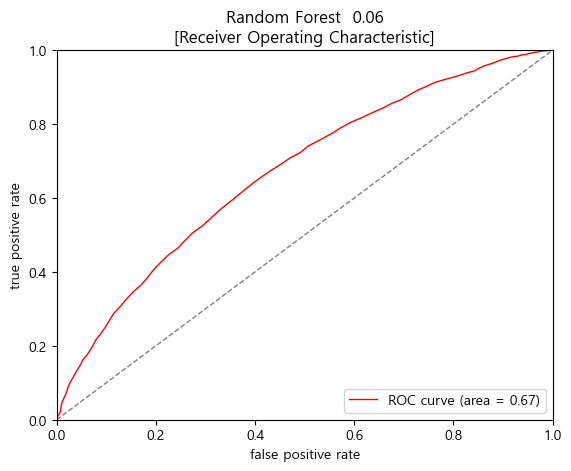

  XGBoost
  Accuracy: 0.632798   Precision: 0.629076   Recall: 0.641533   F1-score: 0.635244



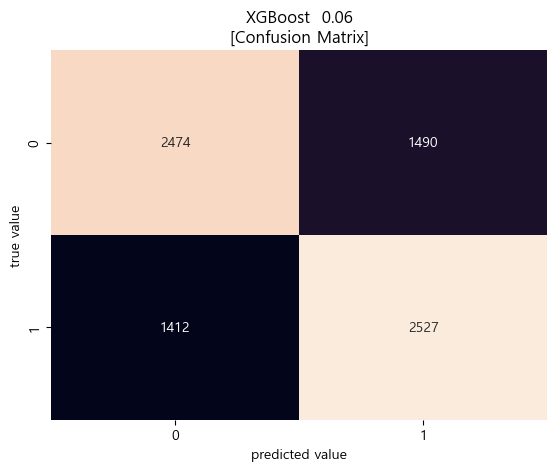

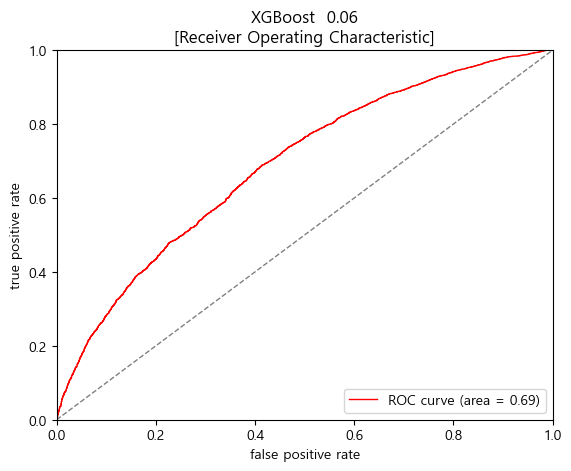


standard x line : 0.05 >
  Logistic Regression
  Accuracy: 0.590156   Precision: 0.591815   Recall: 0.572734   F1-score: 0.582118



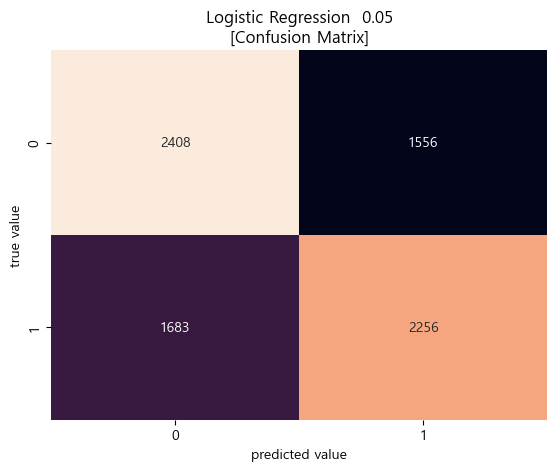

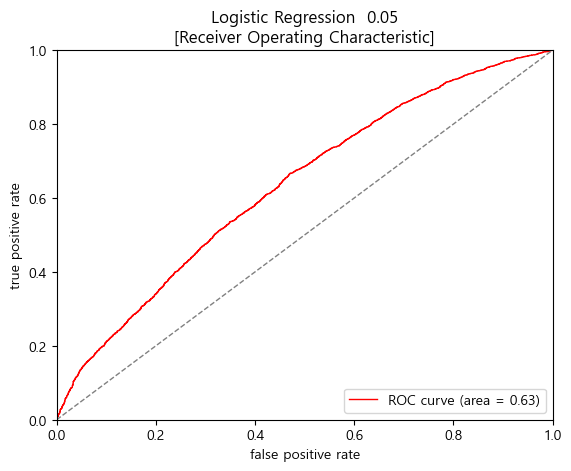

  Decision Tree
  Accuracy: 0.560800   Precision: 0.558559   Recall: 0.566641   F1-score: 0.562571



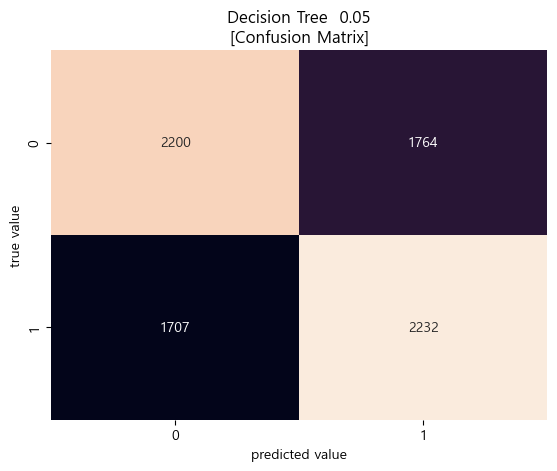

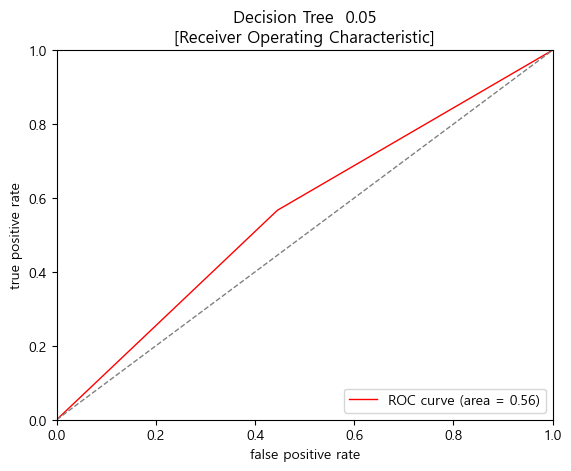

  Random Forest
  Accuracy: 0.639631   Precision: 0.633146   Recall: 0.658543   F1-score: 0.645595



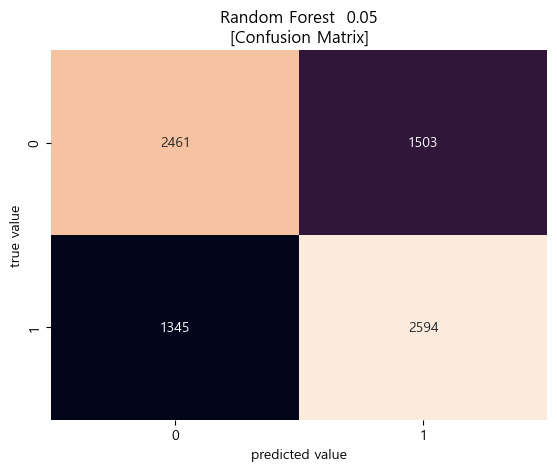

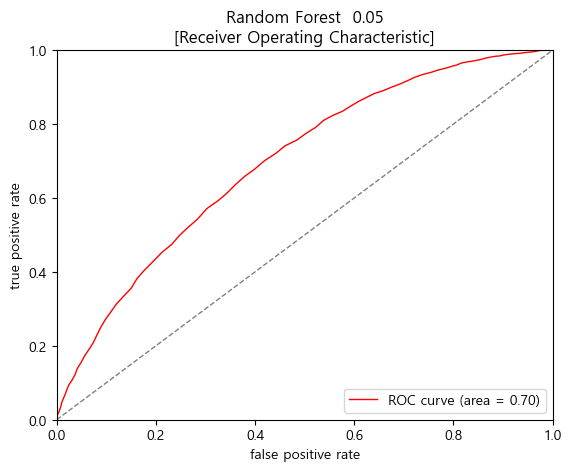

  XGBoost
  Accuracy: 0.646590   Precision: 0.632947   Recall: 0.692562   F1-score: 0.661414



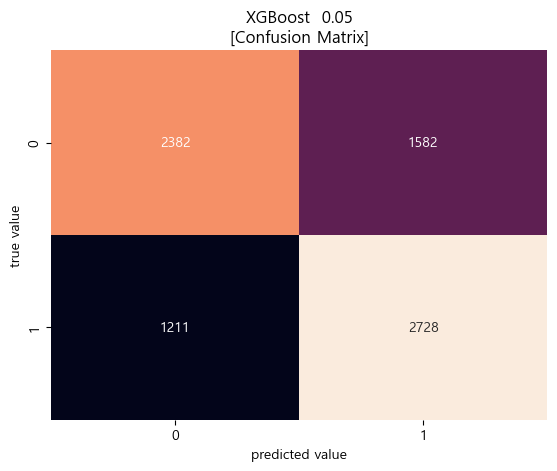

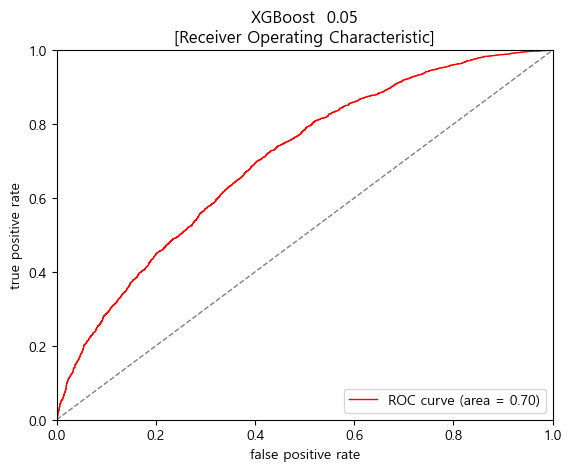

In [28]:
# features 적용
X_features_list = [standard_07, standard_06, standard_05]
x_line_list = ['0.07', '0.06', '0.05']

for feature_standard, x_line in zip(X_features_list, x_line_list):
    X_features = feature_standard

    X = data_fin_dropna_drop[X_features]
    y = data_fin_dropna_drop['고혈압']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    print(f"standard x line : {x_line} >")

    # file 열기 및 저장
    if x_line == x_line_list[0]:
        with open('model_performance metrics.txt', 'w', encoding='utf-8') as f: # 'w' : 덮어쓰기
            f.write(f"standard x line : {x_line} >\n")
    else:
        with open('model_performance metrics.txt', 'a', encoding='utf-8') as f: # 'ㅁ' : 이어쓰기
            f.write(f"standard x line : {x_line} >\n")

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        print(f"  {model_name}")
        print(f"  Accuracy: {accuracy:.6f}   Precision: {precision:.6f}   Recall: {recall:.6f}   F1-score: {f1:.6f}")
        print()
        
        # file에 저장
        with open('model_performance metrics.txt', 'a', encoding='utf-8') as f:
            f.write(f"  {model_name}\n")
            f.write(f"  Accuracy: {accuracy:.6f}   Precision: {precision:.6f}   Recall: {recall:.6f}   F1-score: {f1:.6f}\n")

            if model_name == list(models.keys())[-1]:
                f.write("\n")

        # confusion matrix
        plot_confusion_matrix(y_test, y_pred, model_name, x_line)

        # ROC curve
        plot_roc_curve(X_test, y_test, model, model_name, x_line)
    
    print('='*85)
    print()

### MOVE IMAGE FILE

In [29]:
import os
import shutil

current_dir =  os.getcwd()  # 현재 디렉토리
img_dir = './image/'

# 현재 디렉토리 내 파일 전부 확인
for filename in os.listdir(current_dir):
    if filename.endswith('.jpg'):
        current_file = os.path.join(current_dir, filename)
        img_file = os.path.join(img_dir, filename)
        
        if os.path.exists(img_file):
            os.remove(img_file) # 동일한 파일명이 존재하는 경우
        shutil.move(current_file, img_file)